In [1]:
import numpy as np
import pandas as pd 

#Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Model Building Libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report

In [3]:
df = pd.read_csv("Naive-Bayes-Classification-Data.csv")
df.head(10)

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0
7,30,63,1
8,65,65,1
9,45,82,0


In [15]:
df.shape

(995, 3)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [21]:
# Data Exploration and Preprocessing
df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


<Axes: >

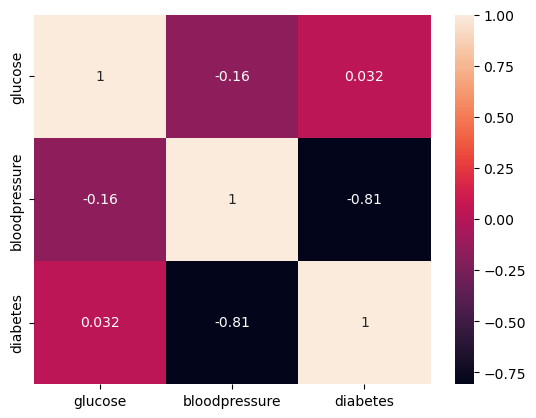

In [23]:
sns.heatmap(df.corr(),annot=True)

In [25]:
df['diabetes'].value_counts()

diabetes
1    498
0    497
Name: count, dtype: int64

In [29]:
df.isnull().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

In [31]:
df.duplicated().sum()

820

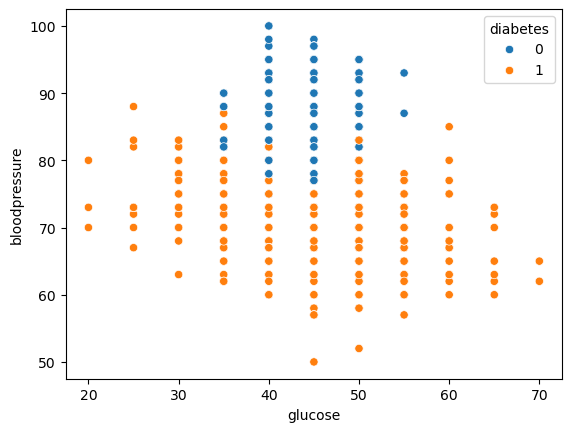

In [35]:
sns.scatterplot(data = df, x = 'glucose', y = 'bloodpressure', hue = 'diabetes')
plt.show()

In [37]:
#Model Building 
X = df.drop('diabetes' , axis=1)
y = df['diabetes']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42 )

In [43]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [47]:
y_pred = model.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.9296482412060302

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        93
           1       0.93      0.93      0.93       106

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199

